In [44]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Definir una paleta base
palette = sns.color_palette("Set2")  # Puedes cambiar "Set2" por otra paleta
# Aplicar la paleta a todos los gráficos por defecto
sns.set_palette(palette)

# Evaluar linealidad de las relaciones entre las variables
from scipy.stats import shapiro, kstest

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("abc_clean.csv", index_col=0)
df.head(2)

,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeenumber,environmentsatisfaction,gender,hourlyrate,jobinvolvement,joblevel,jobrole,jobsatisfaction,maritalstatus,monthlyincome,monthlyrate,numcompaniesworked,overtime,percentsalaryhike,performancerating,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearssincelastpromotion,yearswithcurrmanager,datebirth,salary,remotework
0,No,Unknown,2015.72,Unknown,6,3,Unknown,1,1,Male,NaN,3,5,Research Director,3,Unknown,16280.83,42330.17,7,No,13,3.0,3,Full Time,0,NaN,5,3.0,20,15,15,1972,195370.0,Yes
1,No,Unknown,2063.39,Unknown,1,4,Life Sciences,2,3,Male,NaN,2,5,Manager,3,Unknown,NaN,43331.17,0,Unknown,14,3.0,1,Unknown,1,34.0,5,3.0,33,11,9,1971,199990.0,Yes


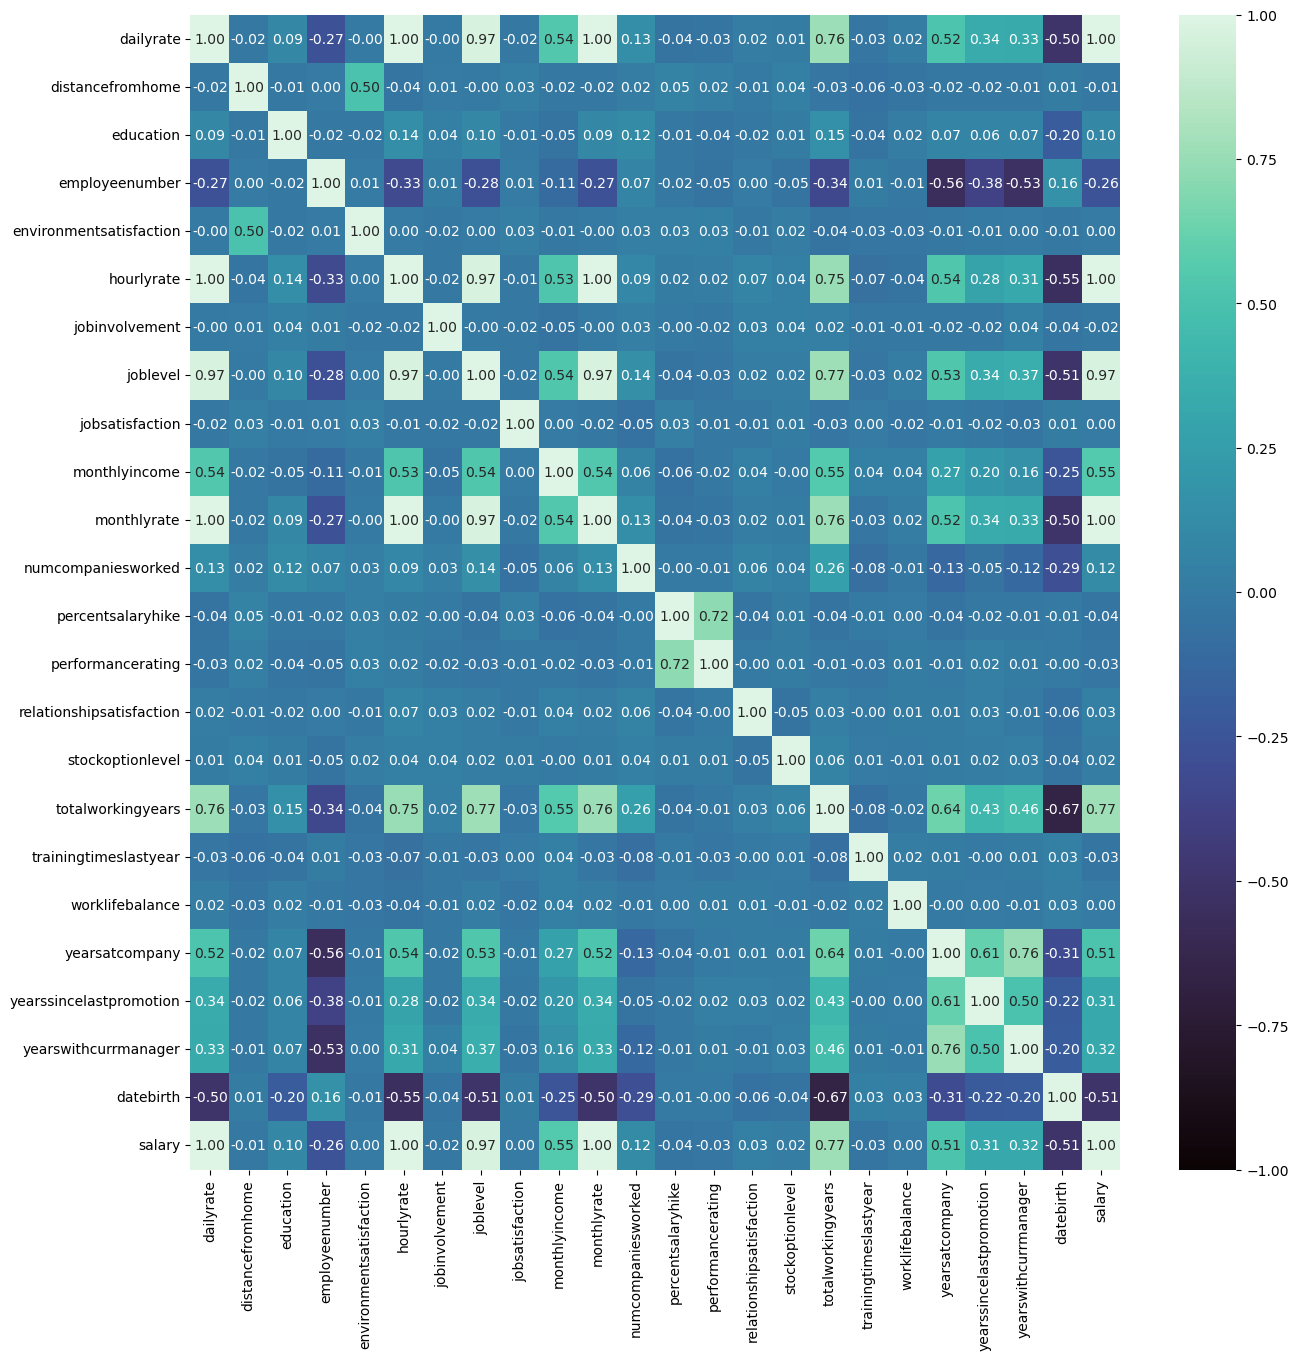

In [4]:
correlacion = df.corr(numeric_only=True)
plt.figure(figsize = (15, 15))

# creamos un heatmap con la máscara correlación
sns.heatmap(correlacion, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1);

In [5]:
df.columns

Index(['attrition', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'overtime',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearssincelastpromotion', 'yearswithcurrmanager', 'datebirth',
       'salary', 'remotework'],
      dtype='object')

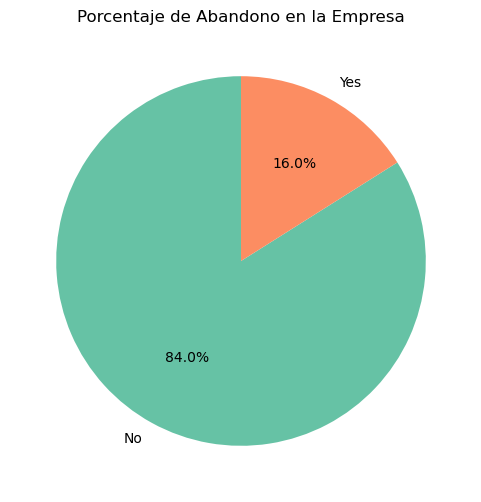

In [46]:

attrition_counts = df["attrition"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Abandono en la Empresa")
plt.show()

#### Comparamos jobsatisfaction vs. salary

- cuando las comparamos solo entre si, no se ve una relación clara, todas similares
- en cambio, cuando comparamos salario de las personas que se fueron y las que siguen trabajando, si podemos ver una gran relación, las personas que abandonaron la empresa cobraban menos que las que siguen trabajando



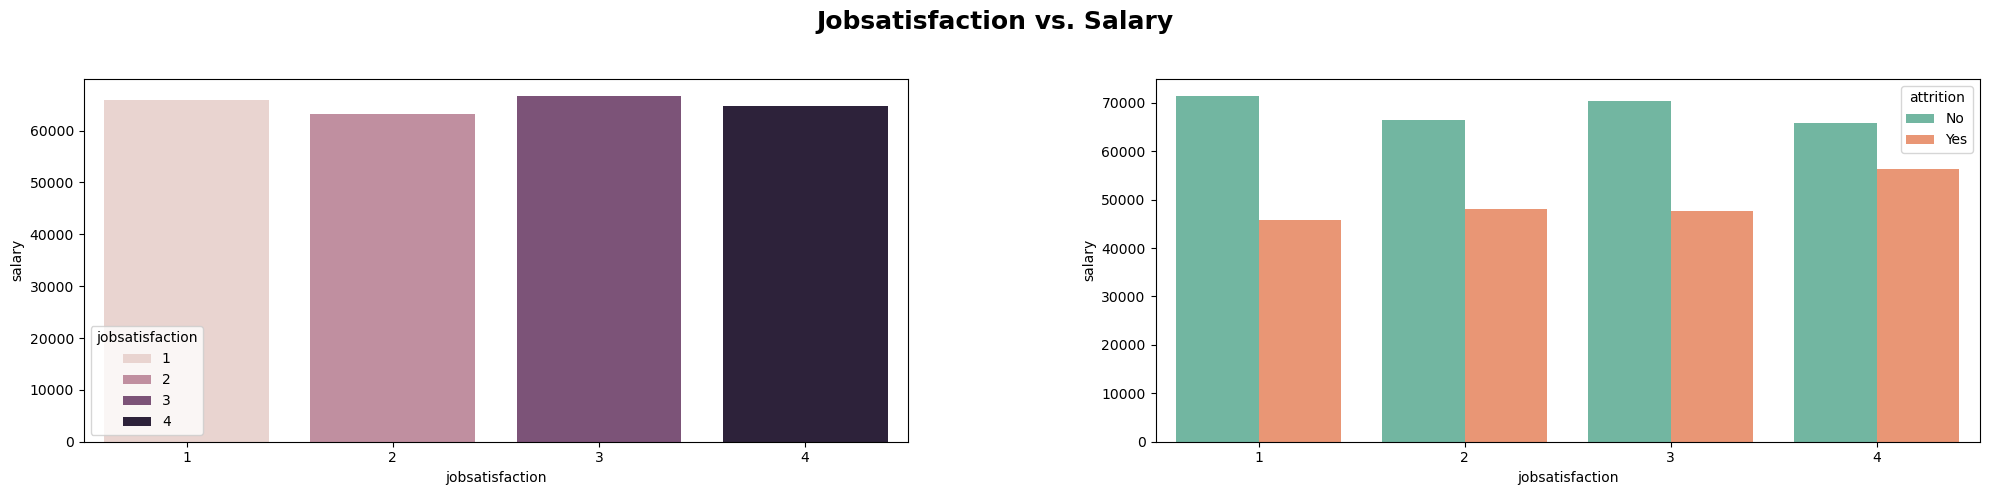

In [52]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Salary", 
             fontsize=18, fontweight="bold")


sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            ax=axes[0])

sns.barplot(y="salary", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            ax=axes[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)


#### Comparamos jobsatisfaction vs. department

- Por departamentos si se ve relacion, HHRR está menos satisfecho, y esto queda aun más visible cuando introducimos la variable "attrition".

Podemos deducir que el departamento menos satisfecho es HHRR, sobre todo para las personas que ya no trabajan en la empresa, quizá se han realizado algunos cambios posteriores a la salida de estas personas que han mejorado la valoración global de satisfacción. Analizar más... RRHH tienen la mayor diferencia de satisfacción entre quienes se quedan y se van. 

Hasta el momento, podemos ver que la variable de satisfacción del puesto de trabajo, es importante, que la empresa podría renovar constantemente estas encuestas de satisfacción del puesto de trabajo.

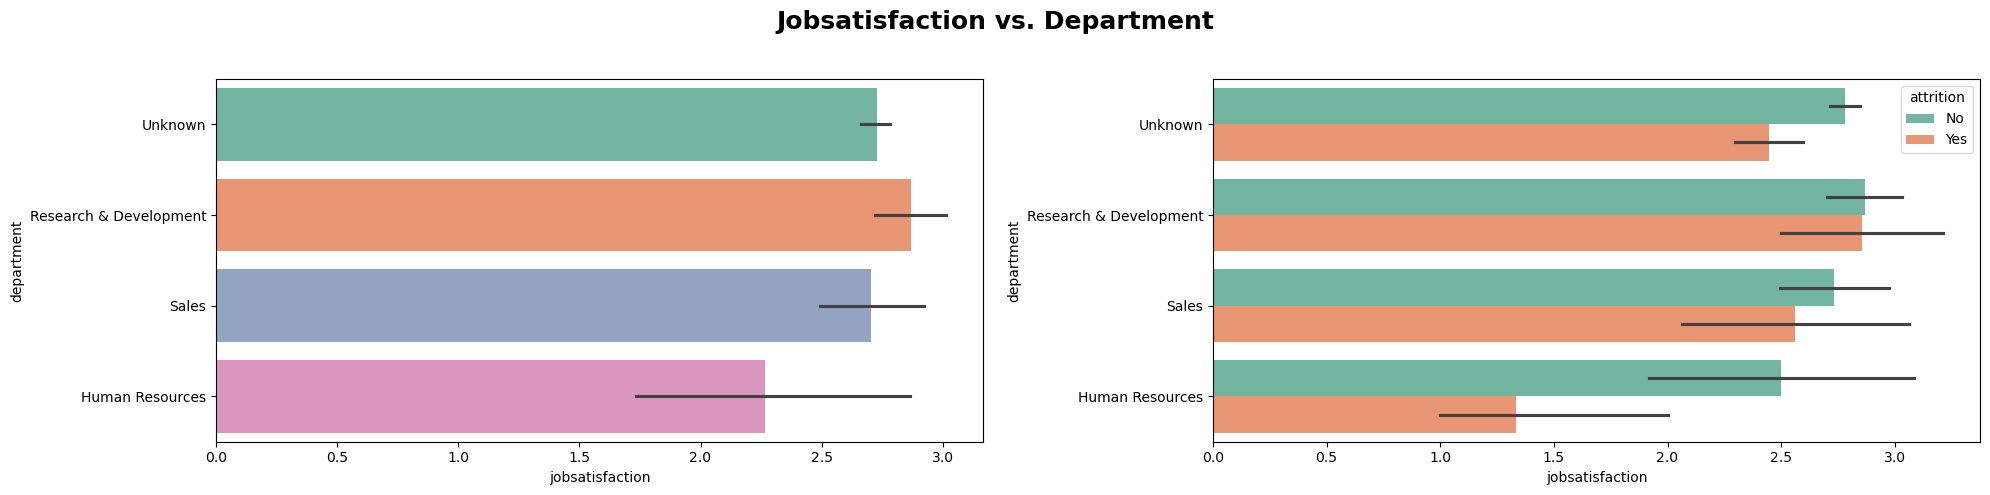

In [53]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Department", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="department", data=df,
            ax=axes[0], palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="department", data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)


### comparamos jobsatisfaction vs.gender 
- en general, podemos deducir que las mujeres están menos satisfechas que los hombres

In [ ]:
gender_counts = df["gender"].value_counts().reset_index()
gender_counts

,gender,count
0,Male,971
1,Female,643


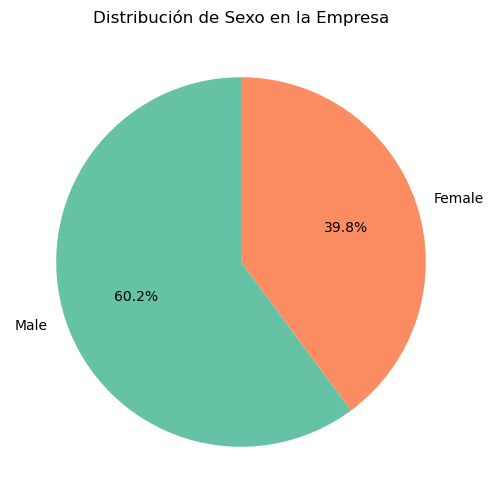

In [54]:

gender_counts = df["gender"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribución de Sexo en la Empresa")
plt.show()

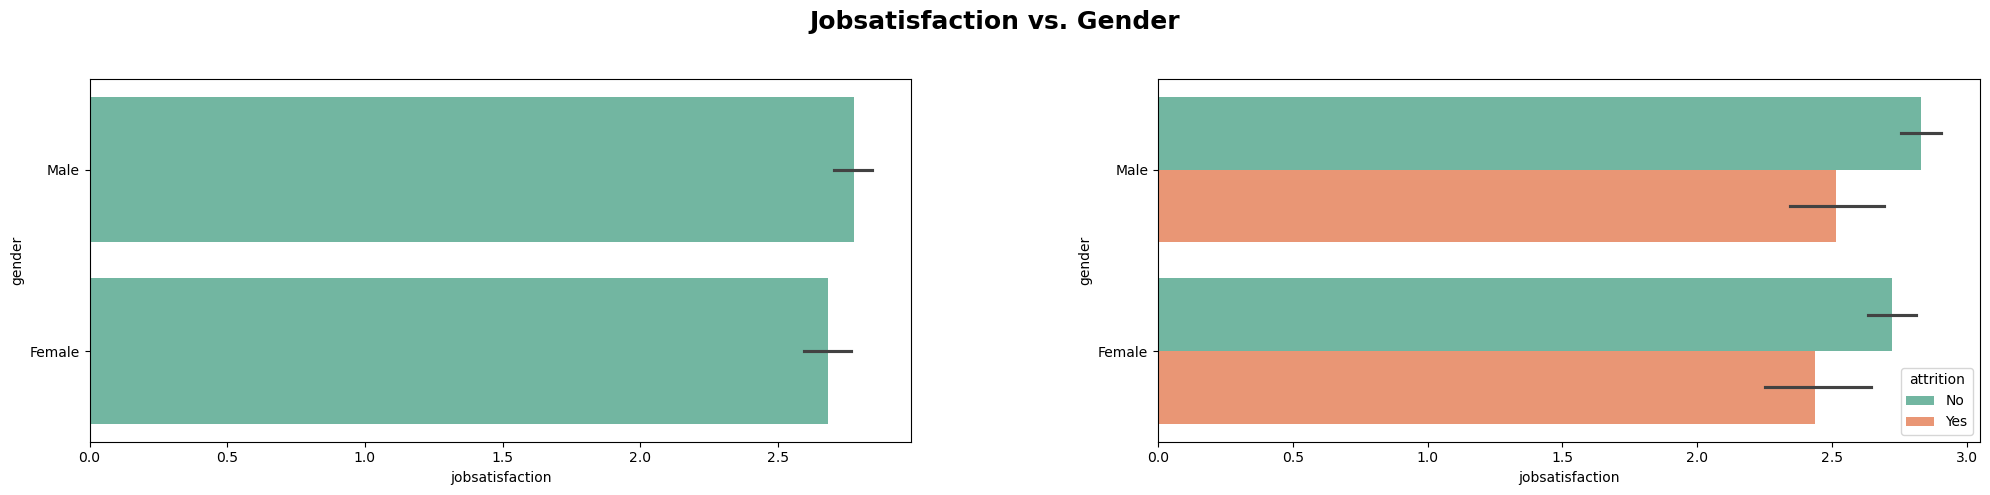

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Gender", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="gender", 
            data=df,
            ax=axes[0])

sns.barplot(x="jobsatisfaction",
            y="gender", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)

### NO LA INCLUIMOS: comparamos jobsatisfaction vs. datebirth 
no vemos relación, faltan datos por edades

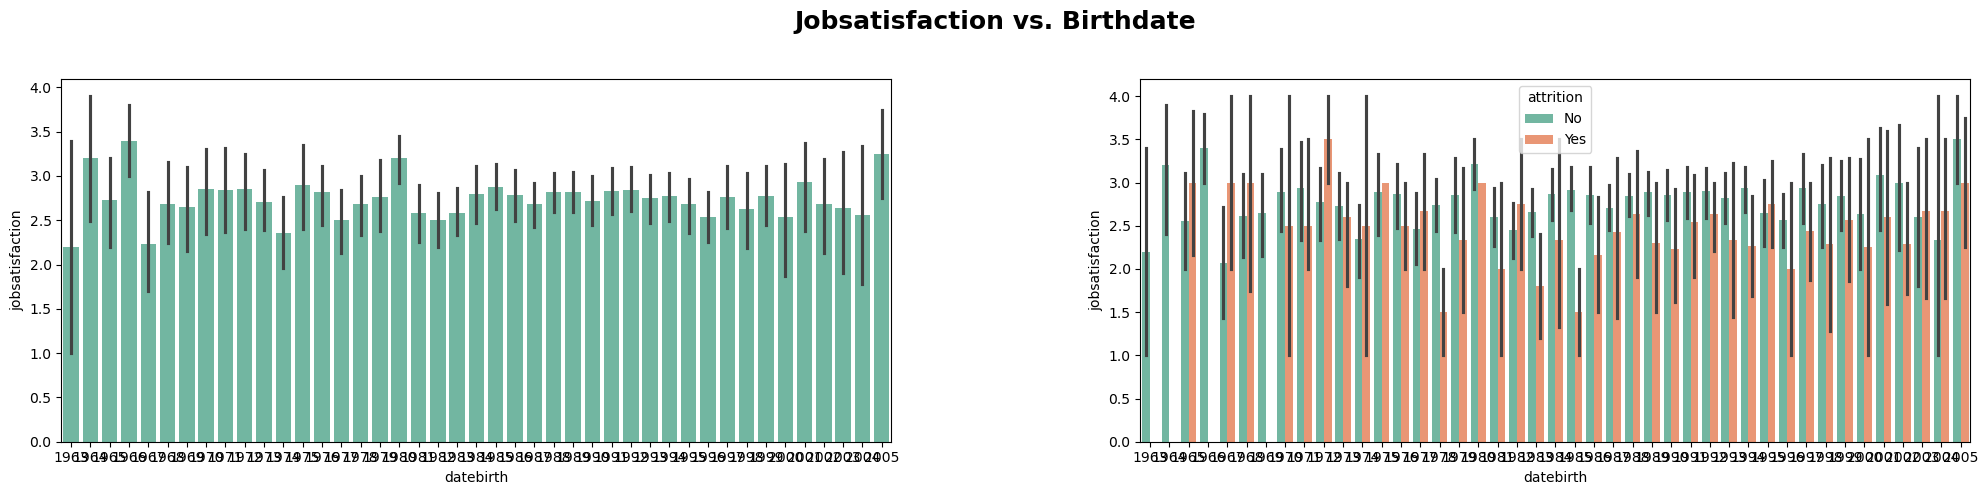

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Birthdate", 
             fontsize=18, fontweight="bold")


sns.barplot(y="jobsatisfaction",
            x="datebirth", 
            data=df,
            ax=axes[0])

sns.barplot(y="jobsatisfaction",
            x="datebirth", 
            data=df,
            ax=axes[1],
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)

### jobsatisfaction vs. remotework

- NO HAY RELACIÓN
- más personas que no trabajaban en remoto ya no trabajan en la empresa comparado a las que si trabajaban en remoto

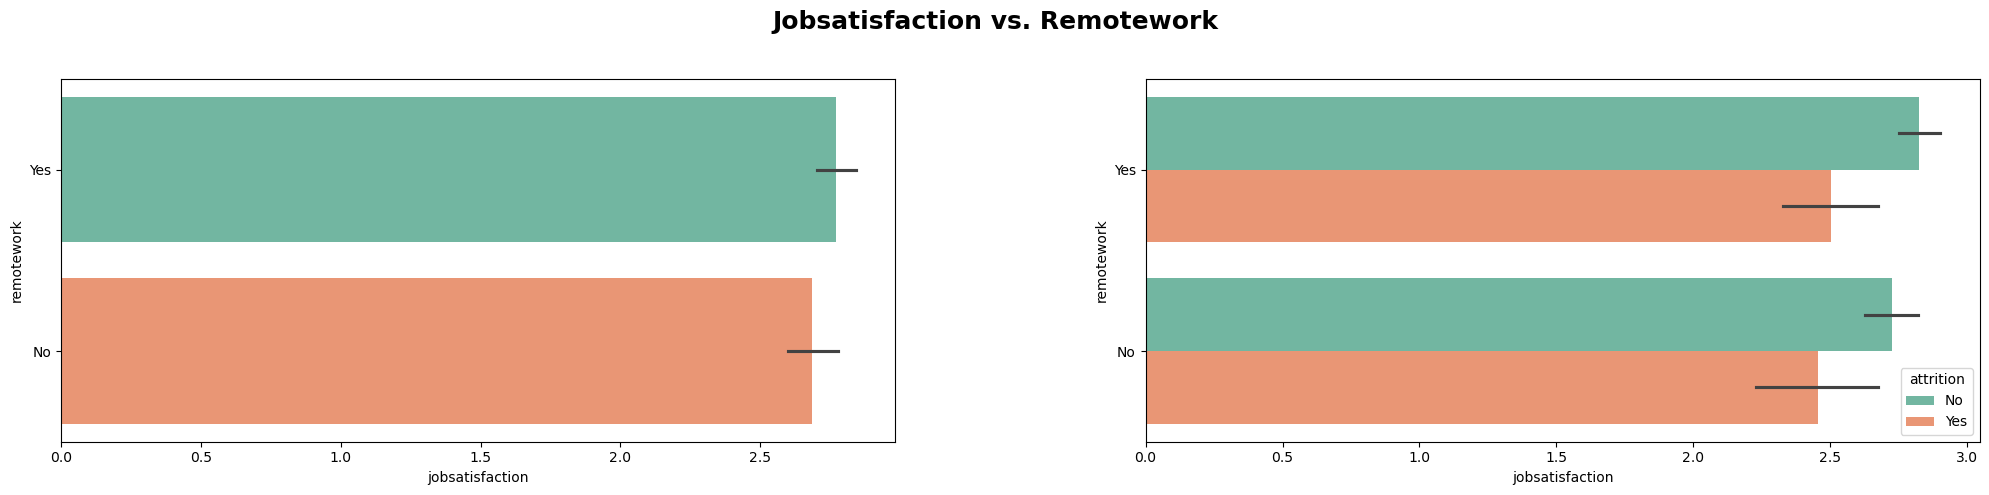

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Remotework", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="remotework", data=df,
            ax=axes[0], 
            palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="remotework", data=df,
            ax=axes[1], 
            palette="Set2",
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3)

### jobsatisfaction vs. businesstravel

No hay una gran diferencia en cuanto a satisfacción según cuanto viajaban o no, 
Cuando introducimos la variable attrition si podemos ver, que las persoans que menos satisfechas estaban y se marcharon de la empresa, no viajaban.

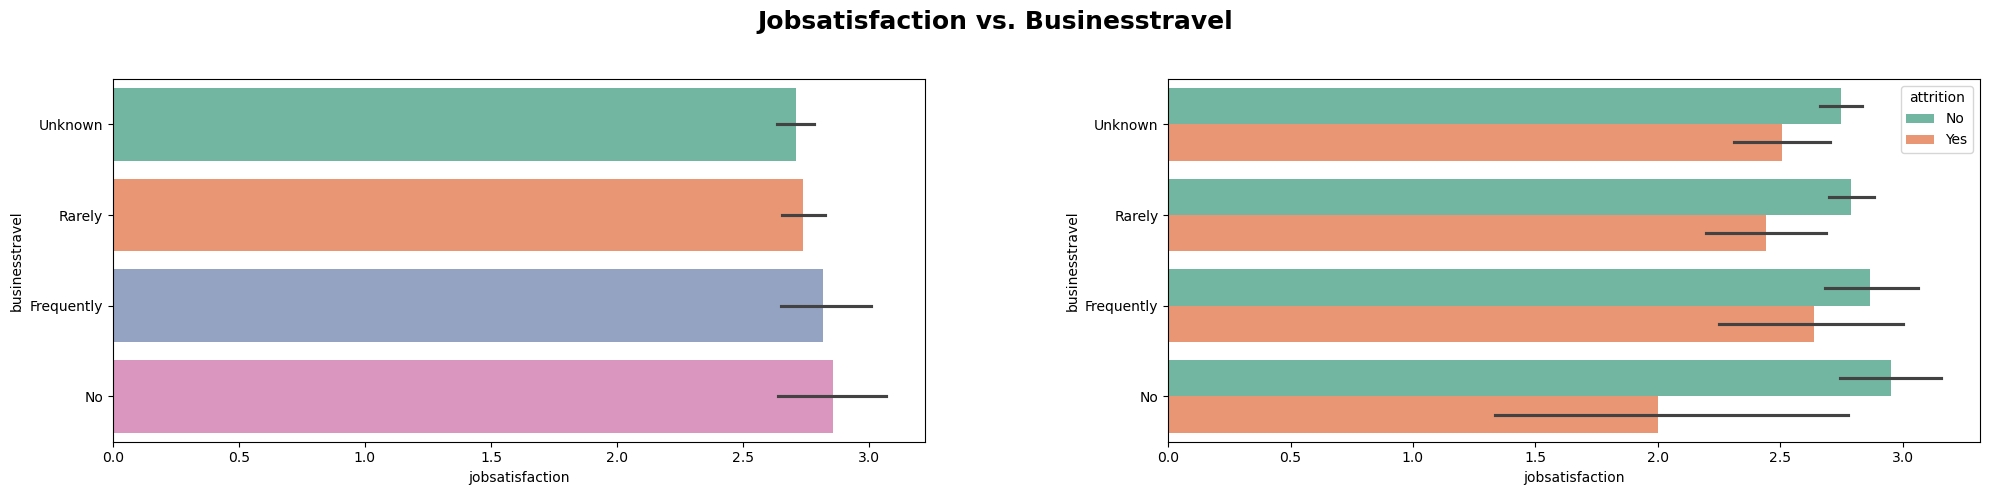

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Businesstravel", 
             fontsize=18, fontweight="bold")


sns.barplot(x="jobsatisfaction",
            y="businesstravel", data=df,
            ax=axes[0], 
            palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="businesstravel", data=df,
            ax=axes[1], 
            palette="Set2",
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

###  NO INCLUIMOS: jobsatisfaction vs. education 

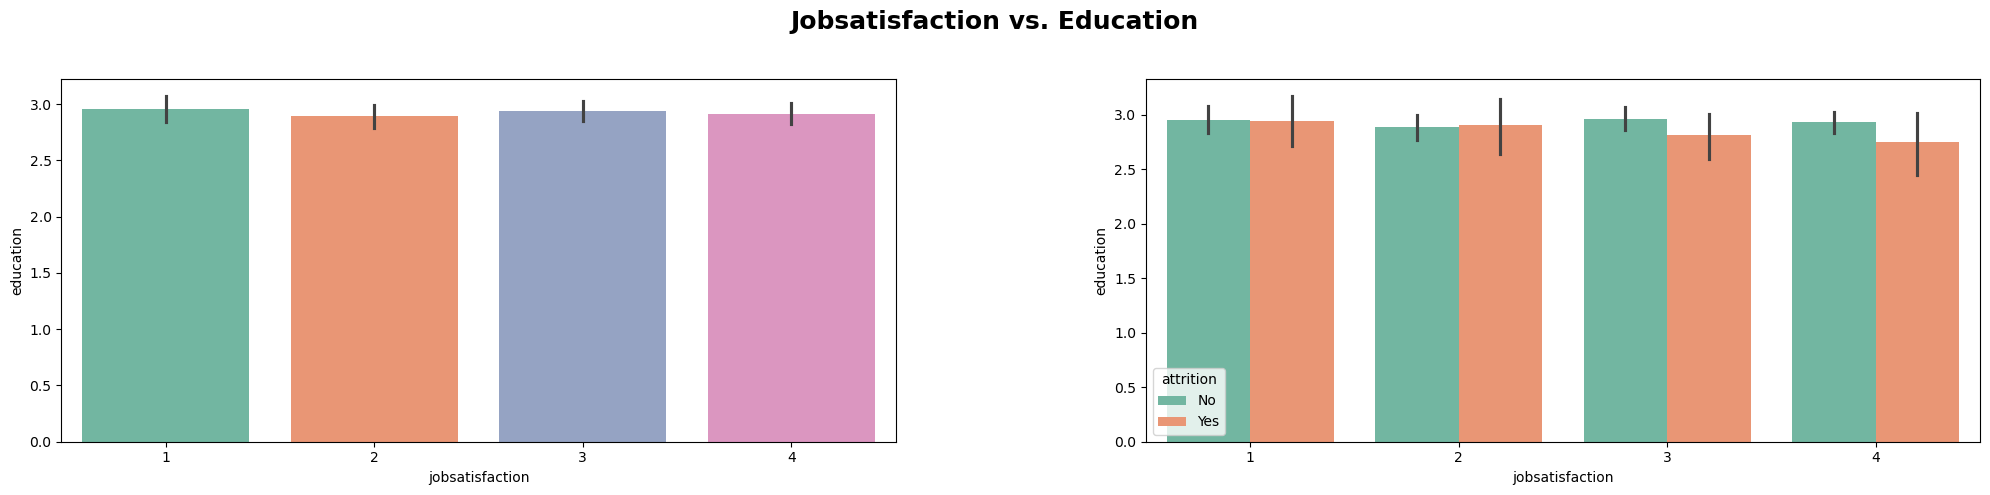

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Education", 
             fontsize=18, fontweight="bold")

sns.barplot(x="jobsatisfaction",
            y="education", data=df,
            ax=axes[0], 
            palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="education", data=df,
            ax=axes[1], 
            palette="Set2",
            hue="attrition")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### NO LA INCLUIMOS: jobsatisfaction vs. jobrole 

MISMA CONCLUSION QUE CON DEPARTMENT, 

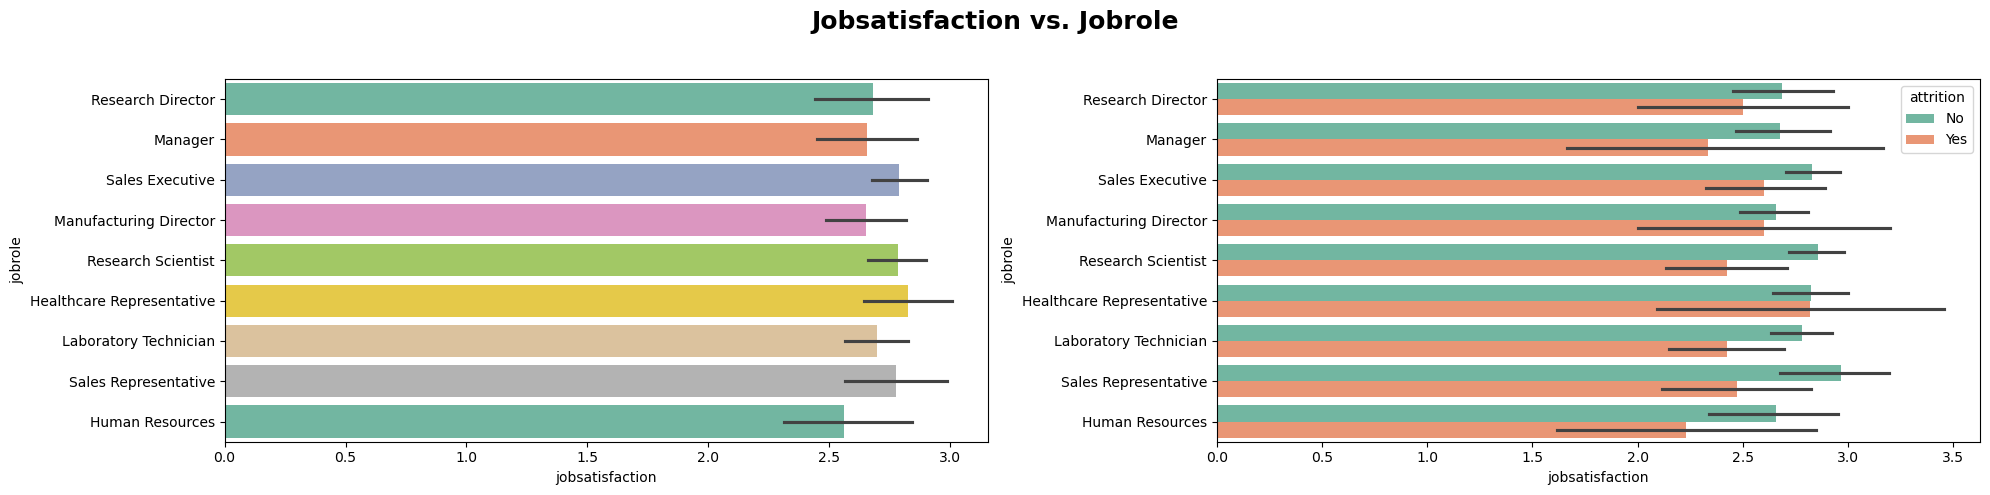

In [65]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Jobrole", 
             fontsize=18, fontweight="bold")

sns.barplot(x="jobsatisfaction",
            y="jobrole", data=df,
            ax=axes[0], 
            palette="Set2")

sns.barplot(x="jobsatisfaction",
            y="jobrole", data=df,
            ax=axes[1], 
            palette="Set2",
            hue="attrition")


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Jobsatisfaction vs. Standardhours

- standardhours (calificación de la jornada, muchos nulos que no eran sustiubles) con jobsatisfaction
 En la primera gráfica sin tener en cuenta 'attrition', se puede ver que las tendencias son iguales, por lo que se prescinde del hue. Hay muchos datos desconocidos. Igual que cuando le apsamos el parámetro hue = 'attrition', no relevante.


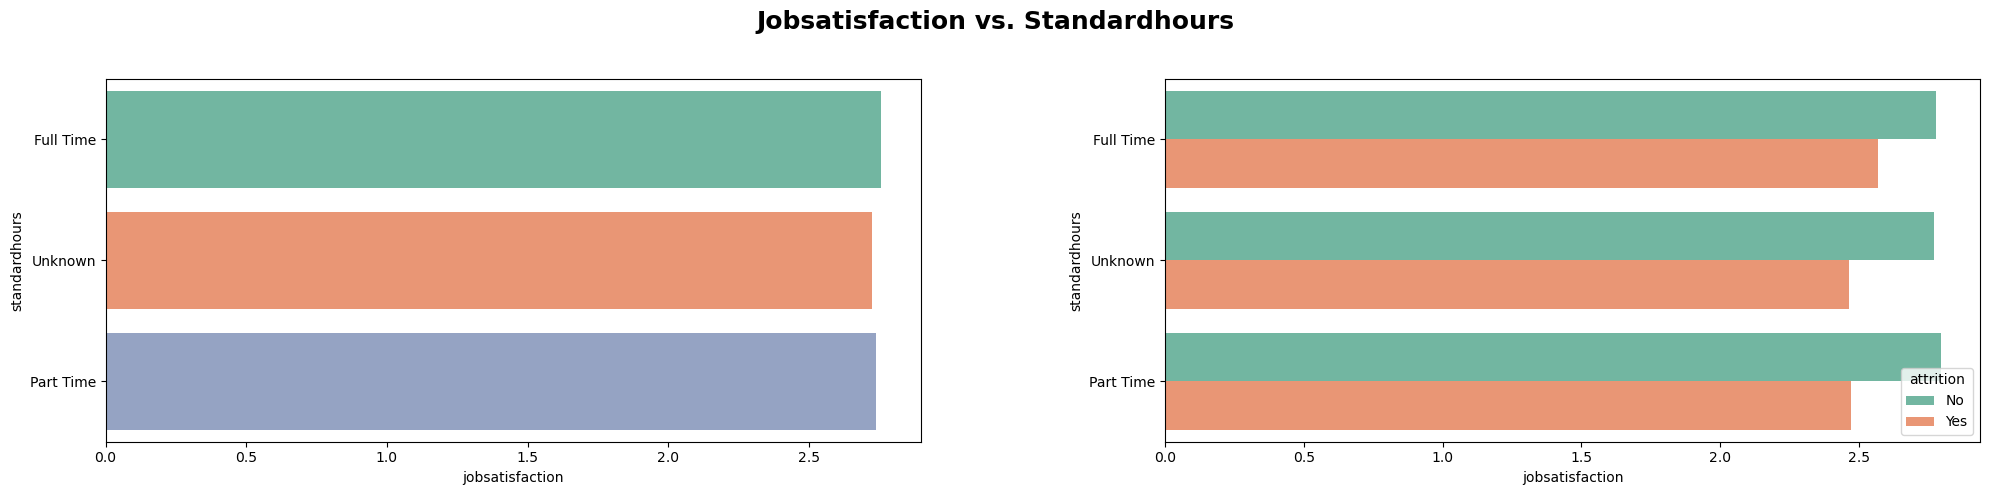

In [68]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="standardhours", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Jobsatisfaction vs. Yearsatcompany

-yearsatcompany: izq: Las barras son muy similares en altura, lo que sugiere que la satisfacción laboral no parece influir mucho en los años en la empresa.
dcha:Se observa que las personas que permanecen en la empresa (No attrition) tienen más años en la empresa en comparación con aquellas que la abandonan (Yes attrition).

En los niveles bajos de jobsatisfaction (1 y 3), los empleados que dejan la empresa tienen significativamente menos años en ella.

En el nivel de jobsatisfaction 4, los empleados que se quedan y los que se van tienen una permanencia más equilibrada, lo que puede indicar que la alta satisfacción ayuda a retener empleados por más tiempo.
La tasa de deserción es más alta cuando los empleados tienen menos años en la empresa y baja satisfacción laboral.

Una estrategia para retener talento podría enfocarse en mejorar la satisfacción laboral, especialmente en los primeros años de trabajo.

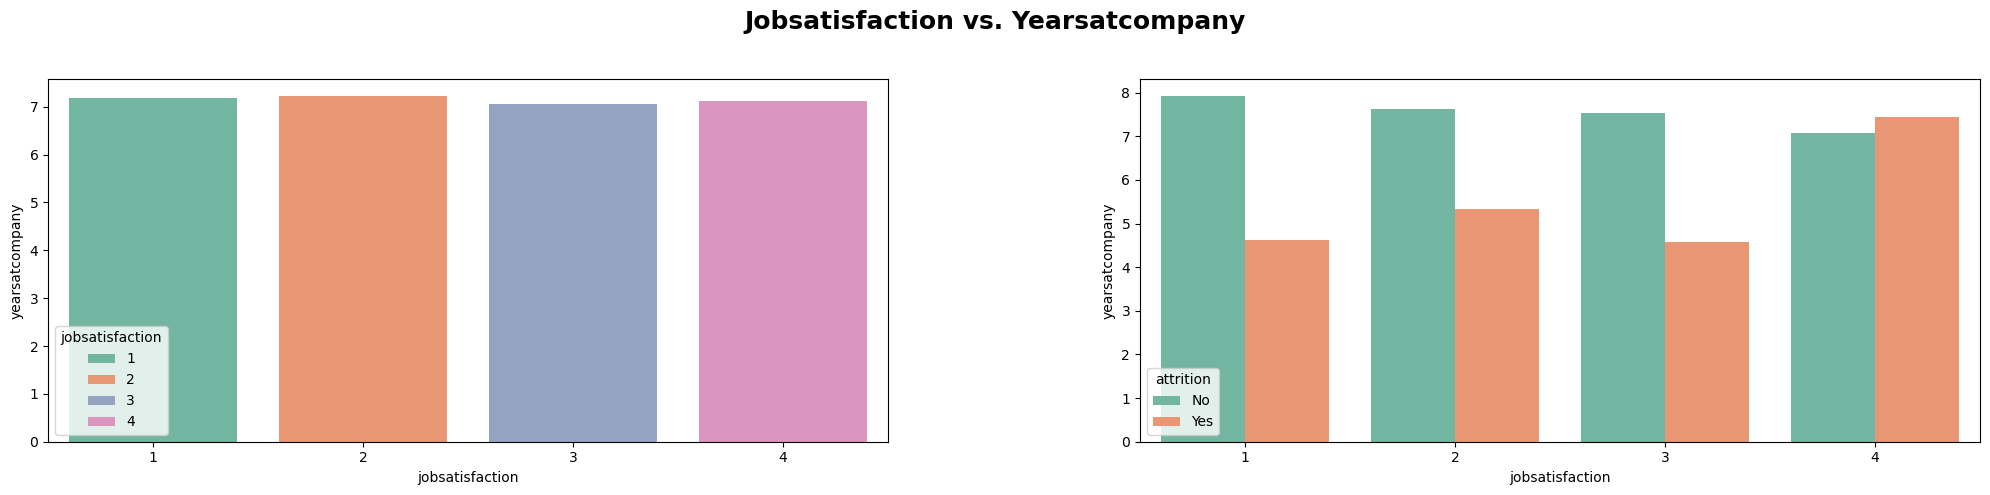

In [69]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Yearsatcompany", 
             fontsize=18, fontweight="bold")


sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="yearsatcompany", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Jobsatisfaction vs. Performancerating

-performancerating :indica que la satisfacción laboral no parece estar directamente relacionada con una mejora o disminución en el desempeño evaluado. No hay relación entre satisfacción laboral y desempeño evaluado.

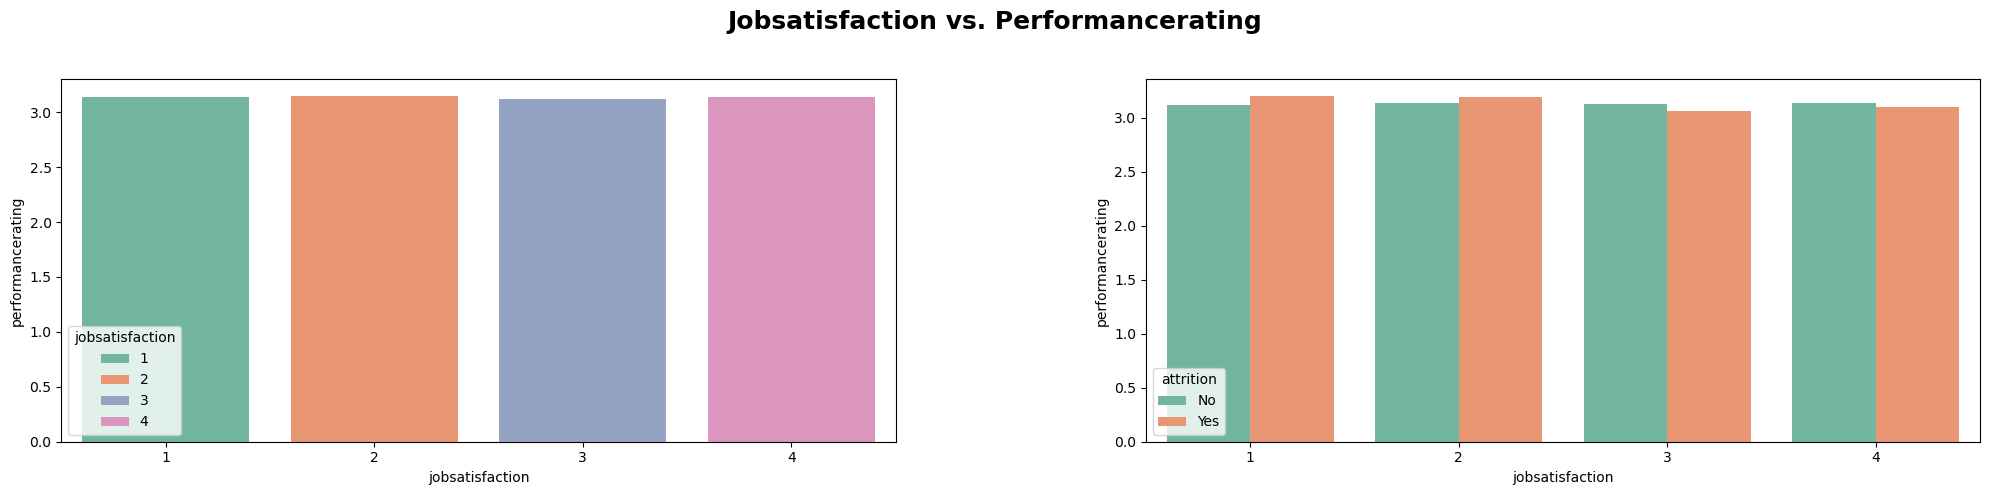

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Jobsatisfaction vs. Performancerating", 
             fontsize=18, fontweight="bold")


sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="jobsatisfaction", 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="performancerating", 
            x="jobsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentsatisfaction vs. Salary

- No veo relaciones claras, al menos de forma visual. En la gráfica de correlación tenía un 0,5 con distancefromhome, pero un 0,5 no nos dice nada.

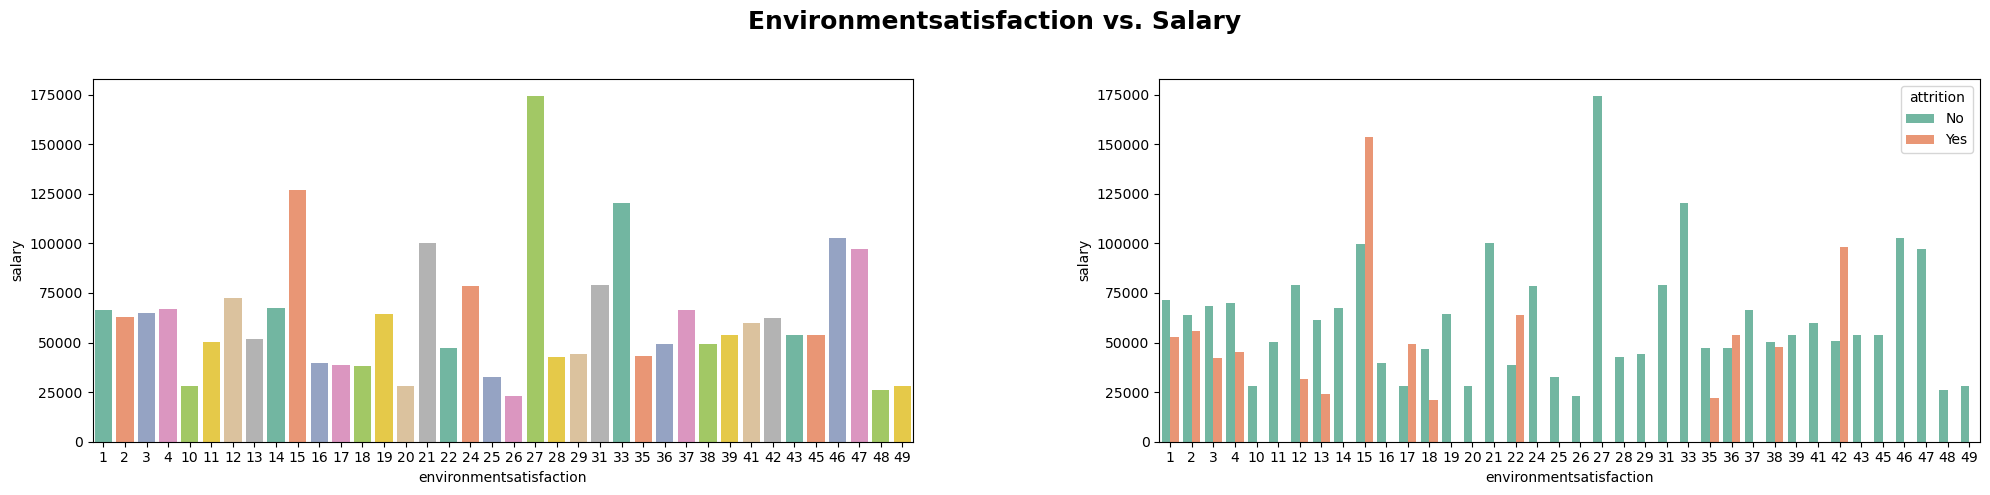

In [71]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Salary", 
             fontsize=18, fontweight="bold")

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="salary", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentesatisfaction vs. Jobrole

- Sales represetative, tiene un bajo nivel en enviromentsatisfaction, por ello más empleados se van de los que se quedan. En cambio Human Reosurces, es al contrario, los que se quedan tienen un gran nivel de satisfacción.
Por lo general no encuentro relacion.

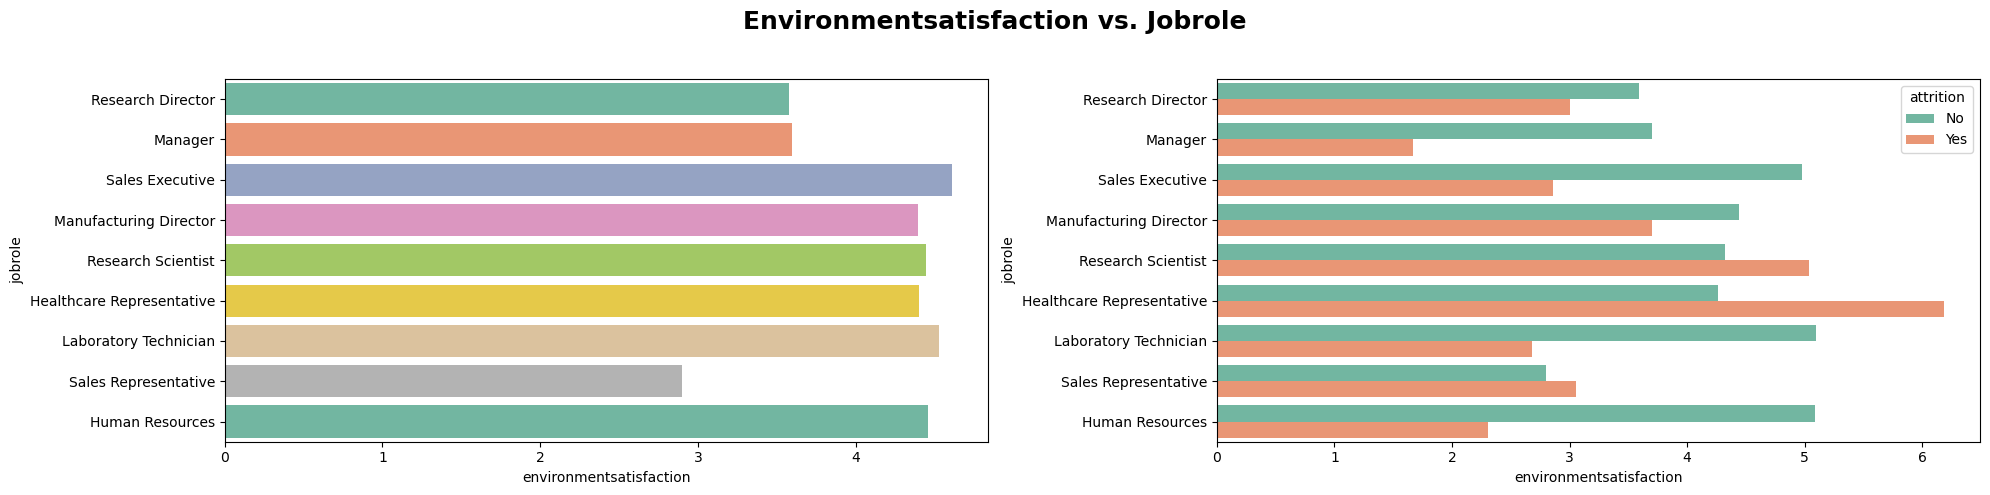

In [72]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Jobrole", 
             fontsize=18, fontweight="bold")


sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="jobrole", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentsatisfaction vs. Department

Tenemos muchos datos desconocidos...

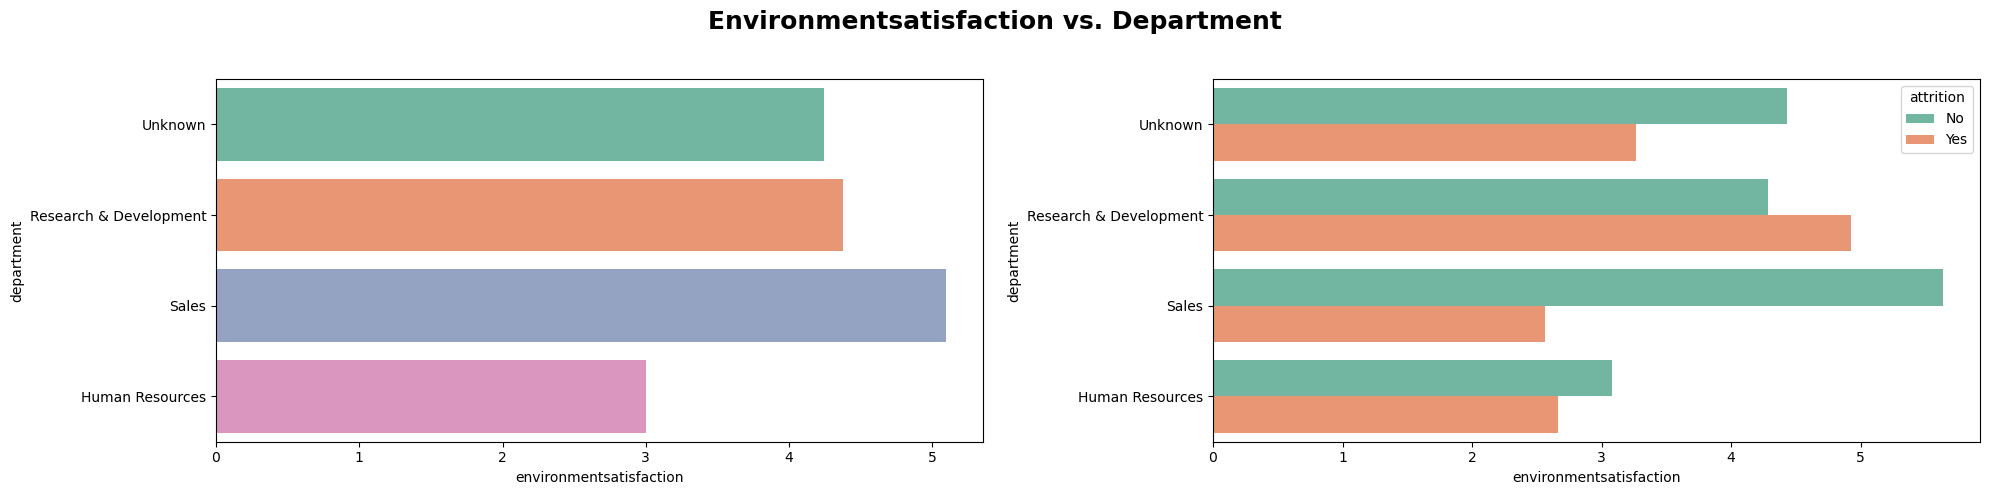

In [73]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Department", 
             fontsize=18, fontweight="bold")


sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="department", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentesatisfaction vs. Gender

No existen diferencias significativas.

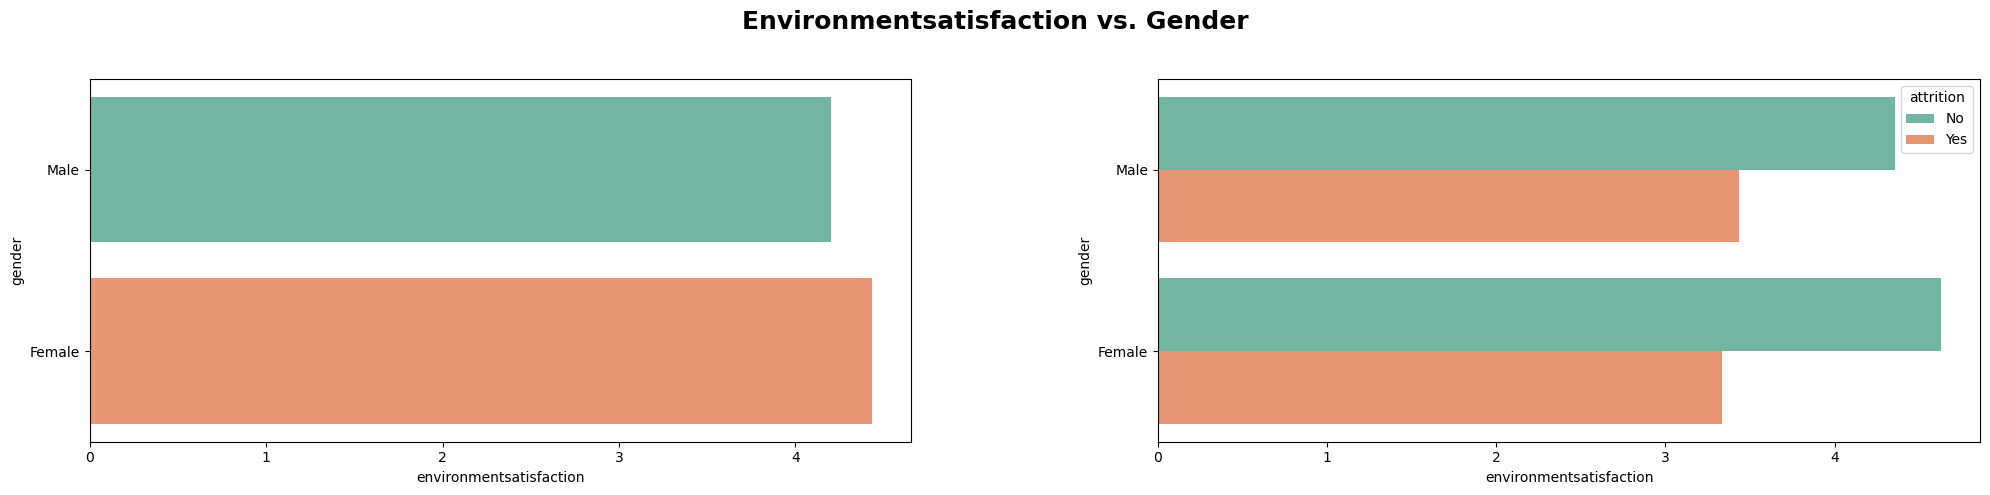

In [74]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Gender", 
             fontsize=18, fontweight="bold")


sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="gender", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False),
            hue="attrition",
            palette="Set2", 
            ax=axes[1])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);

### Environmentsatisfaction vs. Standardhours

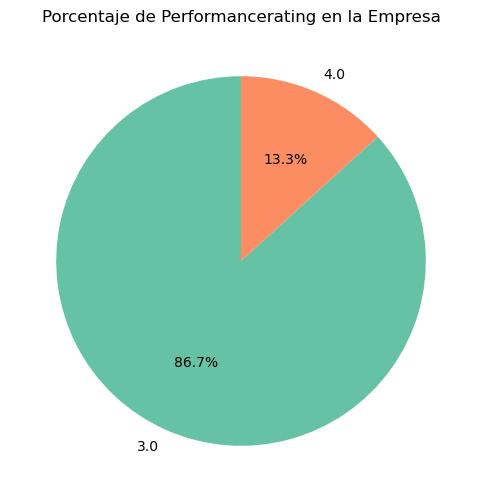

In [66]:
performancerating_counts = df["performancerating"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(performancerating_counts, labels=performancerating_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje de Performancerating en la Empresa")
plt.show()

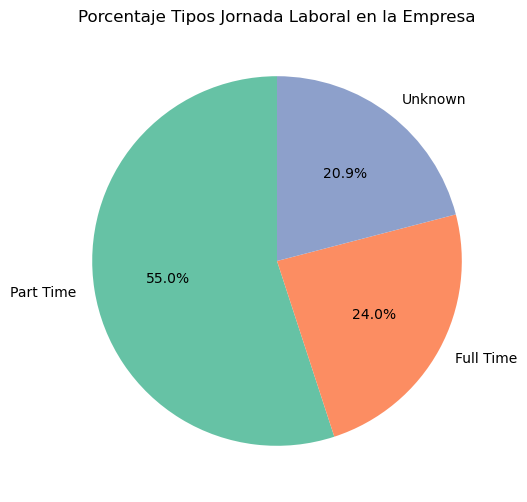

In [67]:
standardhours_counts = df["standardhours"].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(6, 6))
plt.pie(standardhours_counts, labels=standardhours_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Porcentaje Tipos Jornada Laboral en la Empresa")
plt.show()

In [ ]:
tabla_contingencia = pd.crosstab(df['gender'], df['jobrole'], normalize=True) * 100

In [ ]:
tabla_contingencia

jobrole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
gender,,,,,,,,,
Female,3.841388,1.053284,5.700124,3.035936,4.894672,2.168525,7.434944,9.231722,2.478315
Male,5.390335,2.478315,11.524164,3.841388,4.894672,3.283767,12.019827,13.630731,3.097893


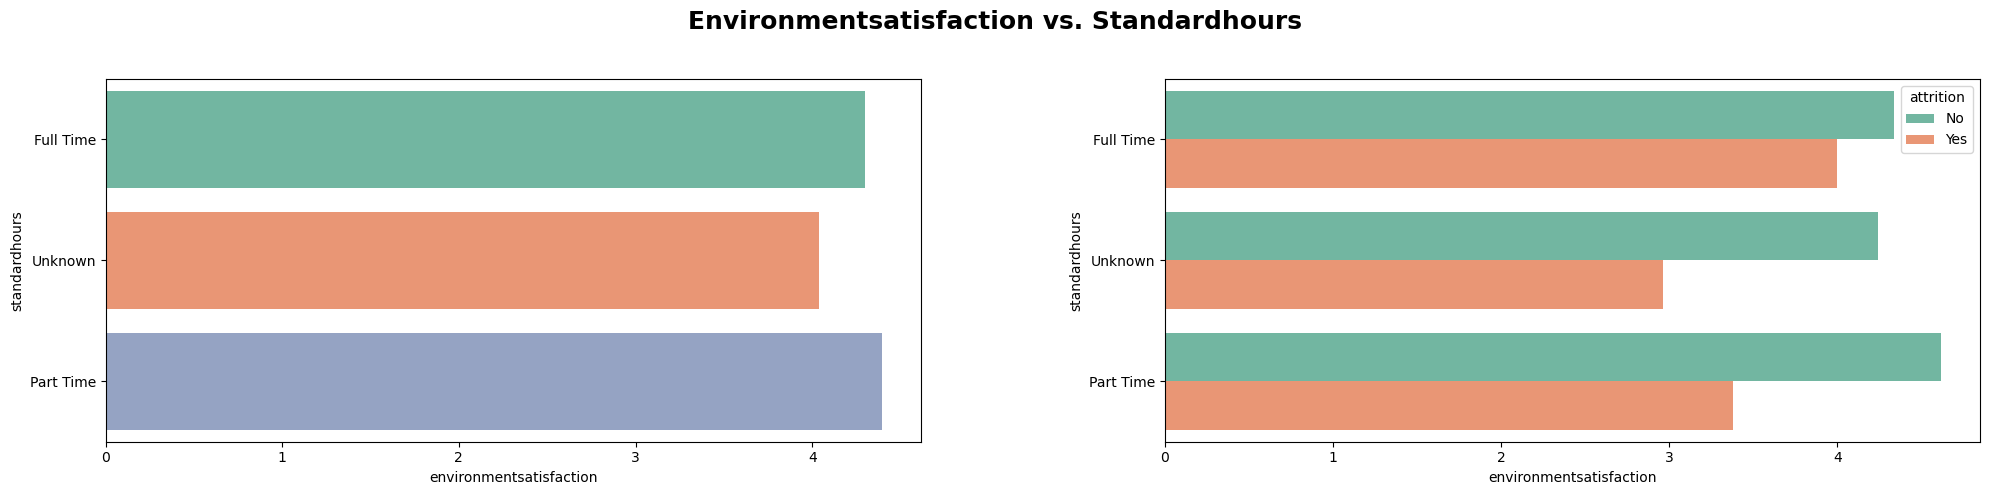

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,5))
fig.suptitle("Environmentsatisfaction vs. Standardhours", 
             fontsize=18, fontweight="bold")


sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            palette="Set2", 
            ax=axes[0])

sns.barplot(y="standardhours", 
            x="environmentsatisfaction", 
            data=df, 
            errorbar=('ci', False), 
            hue="attrition", 
            palette="Set2", 
            ax=axes[1])


plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.subplots_adjust(wspace=0.3);